In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import numpy as np
from os.path import join
from json import load
from matplotlib import rc
import matplotlib.font_manager as fm


# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

def diff(v1, v2):
    return (v1-v2)*100/v1



17
0.5133300000000001


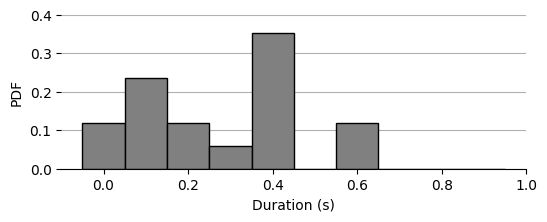

In [2]:
fig, ax = plt.subplots(1,1, figsize=(6,2))

df = pd.concat([
    pd.read_json('./data/gaps-quic.json'),
    # pd.read_json('./data/gaps-2sec-quic.json'),
    # pd.read_json('./data/gaps-1sec-quic.json'),
])
df = df[df['seg_ratio'] > 0.8]
df = df[df['duration'] > 0]
print(len(df))

hist, bins = np.histogram(df['duration'], bins=10, range = (0,1))

print(df.duration.quantile(0.90))

ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey', edgecolor='black')

plt.xlabel('Duration (s)')
plt.ylabel("PDF")
# plt.xlim([0, 1])
plt.ylim([0, 0.4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(which='major', axis='y')
ax.set_axisbelow(True)

plt.savefig("/home/akram/ucalgary/research/overleaf/MM2022_TASQ/figures/eval-gaps-density-quic.pdf", format="pdf", bbox_inches="tight")

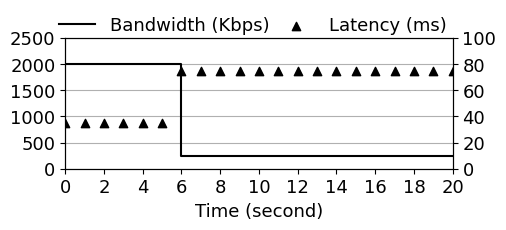

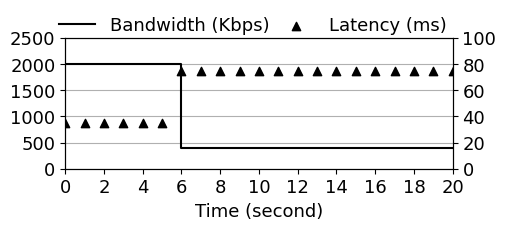

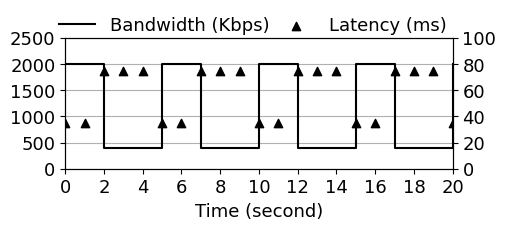

In [3]:
def plot(path, save_path):

    # font = fm.FontProperties(
    #     family = 'DejaVu Serif', fname = '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf')
    plt.rc('pdf',fonttype = 42)
    # plt.rcParams['font.family'] = font.get_name()
    
    
    df = pd.read_csv(path, header=None, sep=' ')
    df  =df.rename(columns={0: 'bw',1: 'latency',2: 'drop'})
    df = df[df.index <= 20]

    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(figsize=(5, 1.7))
    ax2 = ax.twinx()

    ax.step(df.index, df['bw'], where='post', color='black')
    ax.set_ylim(0, 2500)
    ax.set_xlim(0, 20)
    ax.grid(which='major', axis='y')
    ax.set_axisbelow(True)
    _ = plt.xticks(np.arange(0, df.index.max()+1, 2.0))
    ax.yaxis.set_ticks(np.arange(0, 2501, 500))
    # _ = plt.yticks(np.arange(0, 2500, 500))
    ax.set_xlabel('Time (second)')


    ax2.scatter(df.index, df['latency'], color='black', marker='^')
    ax2.set_ylim(0, 100)
    ax2.yaxis.set_ticks(np.arange(0, 101, 20))
    # ax2.yaxis.set_ticks(np.arange())\
    fig.legend(['Bandwidth (Kbps)','Latency (ms)'], bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, frameon=False, columnspacing=0.5)
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.show()



bw_profiles = [
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_always_low.txt",
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_always_400.txt",
    "/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_multi-drop.txt"
]

plot(bw_profiles[0], 'bw-profile-drop-low.pdf')
plot(bw_profiles[1], 'bw-profile-drop.pdf')
plot(bw_profiles[2], 'bw-profile-multi-drop.pdf')

-5.935363138957941
-4.587719999999997


Text(0, 0.5, 'Bandwidth Estimation Error (%)')

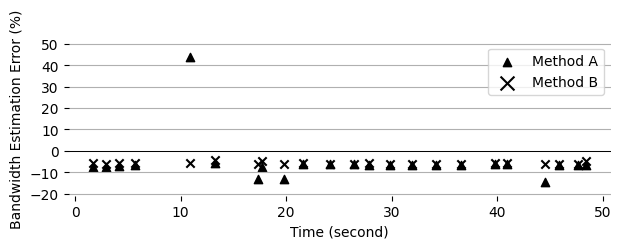

In [2]:
fig, ax = plt.subplots(1,1, figsize=(7,2))
with open("./data/data-bw_ab.json") as f:
    data = load(f)

df = pd.read_csv("/home/akram/ucalgary/research/beta/scripts/expr/bandwidth/bw_always_low.txt", header=None, sep=' ')
df  =df.rename(columns={0: 'bw',1: 'latency',2: 'drop'})
# df = df[df.index <= 55]
df.index += 1


df_a = pd.DataFrame(data['segments'][1:])
df_a['bandwidth'] = df_a['throughput'] / 1000
df_a = df_a.set_index('start')
# df_a[df_a.index.to_series().round() != 11]
# df_a['diff'] = (df_a.bandwidth-2000) if df_a.index < 6.4 else (df_a.bandwidth-250)

df_b = pd.DataFrame(data['bandwidth_estimate'])
df_b['bandwidth'] /= 1000
df_b = df_b.set_index('time')
df_b = df_b.reindex(df_b.index.union(df_a.index)).ffill().loc[df_a.index]

df = df.reindex(df.index.union(df_a.index)).ffill().loc[df_a.index]
df_b['error'] = ((df_b['bandwidth'] - df['bw'])*100)/df['bw']
df_a['error'] = ((df_a['bandwidth'] - df['bw'])*100)/df['bw']

ax.scatter(df_a.index, df_a['error'], marker='^', color='black')
ax.scatter(df_b.index, df_b['error'], marker='x', color='black')

ax.axhline(y=0, color='black', lw=0.7)

print(df_a.error.quantile(0.95))
print(df_b.error.quantile(0.95))

# ax.step(df.index, df['bw'], where='post', color='black')
# ax.scatter(df_b.index, df_b['bandwidth'], marker='.', s=10)
# ax.scatter(df_a.index, df_a['bandwidth'], marker='x')

lgnd = ax.legend(['Method A', 'Method B'])
lgnd.legendHandles[1]._sizes = [100]


ax.set_ylim(-21, 51)
# ax.set_xlim(0, 20)
ax.grid(which='major', axis='y')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# _ = plt.xticks(np.arange(0, df.index.max()+1, 2.0))
ax.yaxis.set_ticks(np.arange(-20, 51, 10))
ax.set_xlabel('Time (second)')
ax.set_ylabel('Bandwidth Estimation Error (%)')

# plt.savefig("/home/akram/ucalgary/research/overleaf/MM2022_TASQ/figures/eval-bw-methods-error.pdf", format="pdf", bbox_inches="tight")


/tmp/ipykernel_220028/2260268448.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


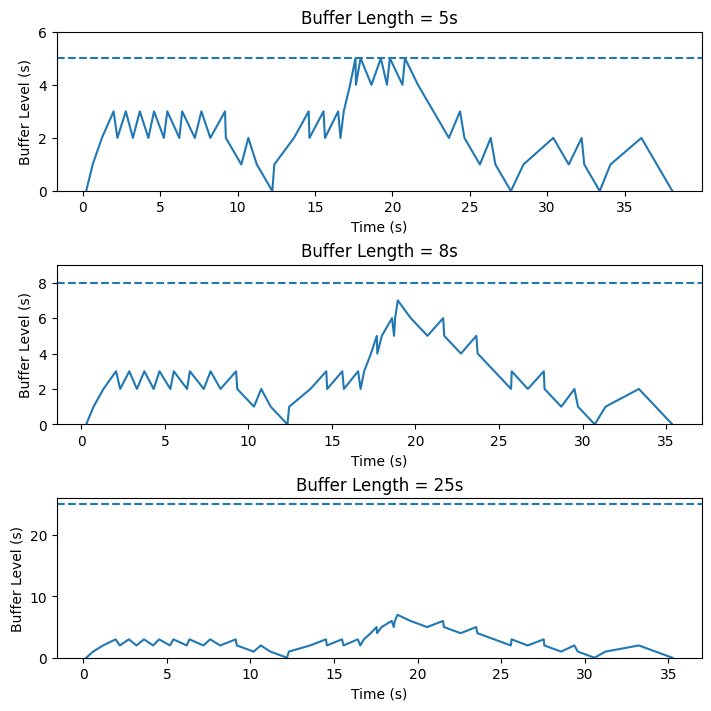

In [34]:
fig, ax = plt.subplots(3,1, constrained_layout=True, figsize=(7,7))
df_5 = pd.read_json('./data/5s.json')
df_8 = pd.read_json('./data/8s.json')
df_25 = pd.read_json('./data/25s.json')

ax[0].plot(df_5.time, df_5.level)
ax[0].set_ylim(0, 6)
ax[0].set_ylabel("Buffer Level (s)")
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Buffer Length = 5s")
ax[0].axhline(y=5, linestyle='--')

ax[1].plot(df_8.time, df_8.level)
ax[1].set_ylim(0, 9)
ax[1].set_ylabel("Buffer Level (s)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Buffer Length = 8s")
ax[1].axhline(y=8, linestyle='--')

ax[2].plot(df_25.time, df_25.level)
ax[2].set_ylim(0, 26)
ax[2].set_ylabel("Buffer Level (s)")
ax[2].set_xlabel("Time (s)")
ax[2].set_title("Buffer Length = 25s")
ax[2].axhline(y=25, linestyle='--')

fig.show()


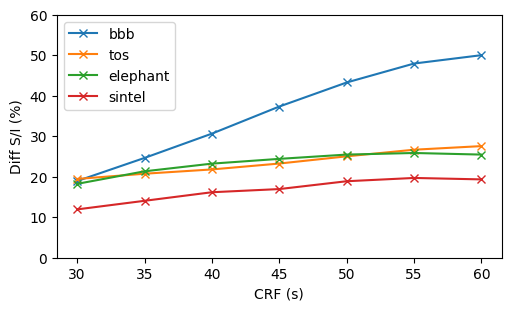

In [40]:
from json import load
import os

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3))
duration = 30
fps = 24
videos = ["bbb", "tos", "elephant", "sintel"]
seg_types = ['i', 'is', 'iss', 'isss', 'issss', 's']

def get_df(video):
    df = pd.DataFrame({"time": range(duration)})

    with open(f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/motion_activity/{video}.json") as f:
        ma = load(f)
    df["motion_activity"] = [sum(ma[fps * s : fps * (s + 1)]) / fps for s in range(duration)]

    for seg_type in ('i', 's'):
        for crf in range(30, 61, 5):
            dash_dir = f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/dash/{video}/{video}1s_{duration}s_{seg_type}_crf{crf}"
            df[f"size_{seg_type}_crf{crf}"] = [os.path.getsize(f"{dash_dir}/segment_{s+1}.m4s") for s in range(duration)]
    return df


df_all = {vid: get_df(vid) for vid in videos}

crfs = range(30, 61, 5)
for video in videos:
    df = df_all[video]
    ax.plot(
        crfs,
        [(diff(df[f"size_i_crf{crf}"].sum(), df[f"size_s_crf{crf}"].sum())) for crf in crfs],
        marker="x",
        label=video
    )
ax.set_ylabel("Diff S/I (%)")
ax.set_xlabel("CRF (s)")
ax.set_ylim([0, 60])
ax.legend()



Text(0, 0.5, 'Improvement over I (%)')

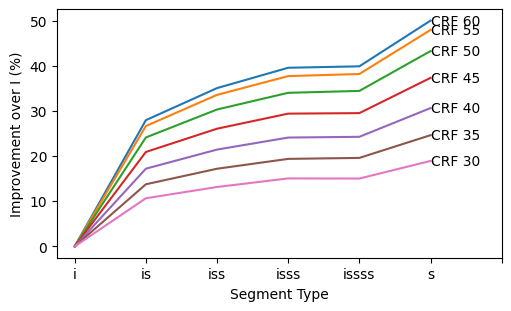

In [7]:
duration = 30
df = pd.DataFrame({"time": range(duration)})
video = 'bbb'
seg_types = ['i', 'is', 'iss', 'isss', 'issss', 's']

for seg_type in seg_types:
    for crf in range(30, 61, 5):
        dash_dir = f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/dash/{video}/{video}1s_{duration}s_{seg_type}_crf{crf}"
        df[f"size_{seg_type}_crf{crf}"] = [os.path.getsize(f"{dash_dir}/segment_{s+1}.m4s") for s in range(duration)]

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3))
for crf in range(60, 29, -5):
    vals = [diff(df[f'size_i_crf{crf}'].mean(), df[f'size_{seg_type}_crf{crf}'].mean()) for seg_type in seg_types]
    ax.plot(
        seg_types, 
        vals,
        # label=f"CRF {crf}"
    )
    ax.text(seg_type[-1], vals[-1]-1, f'CRF {crf}')
ax.set_xticks([*seg_types, ''])
ax.set_xlabel('Segment Type')
ax.set_ylabel('Improvement over I (%)')
# ax.legend()

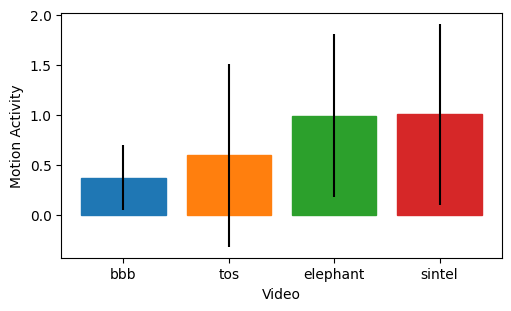

In [21]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3))

bars = ax.bar(
    videos,
    [df_all[vid]["motion_activity"].mean() for vid in videos],
    yerr = [df_all[vid]["motion_activity"].std() for vid in videos]
)
ax.set_xlabel('Video')
ax.set_ylabel('Motion Activity')
for i in range(len(videos)):
    bars[i].set_color(COLORS[i])

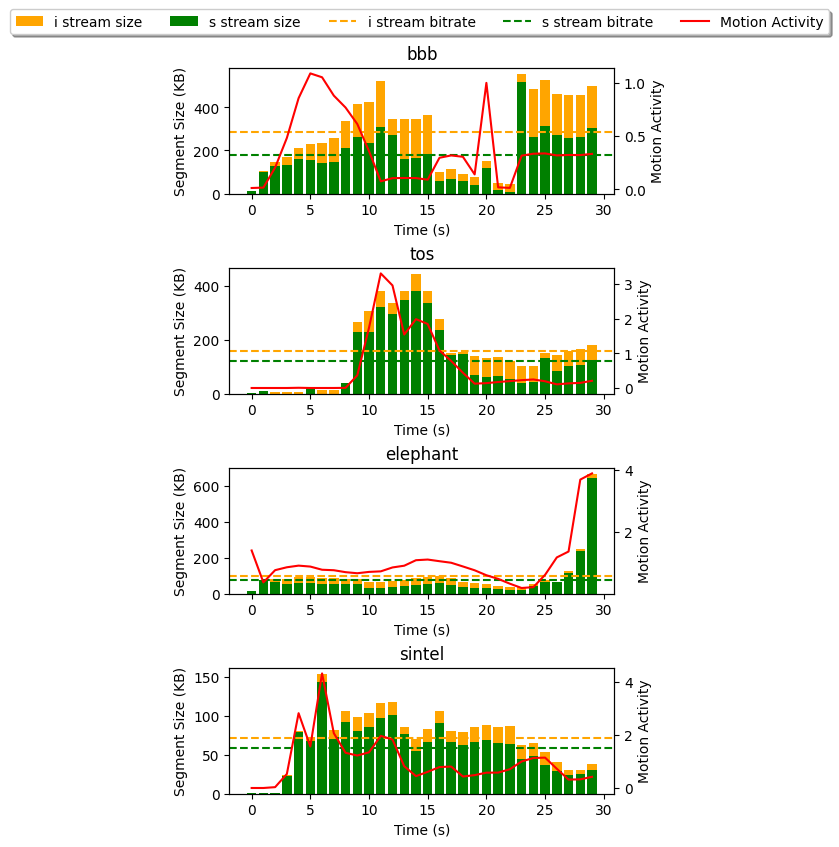

In [41]:
fig, ax = plt.subplots(4, 1, constrained_layout=True, figsize=(5, 8))
videos = ["bbb", "tos", "elephant", "sintel"]

for ax, video in zip(ax, videos):
    lns = []
    df = df_all[video]
    crf = 45
    ax2 = ax.twinx()
    lns.append(ax.bar(df.time, df[f"size_i_crf{crf}"] / 1000, label=f"size_i_crf{crf}", color='orange'))
    lns.append(ax.bar(df.time, df[f"size_s_crf{crf}"] / 1000, label=f"size_s_crf{crf}", color='green'))
    ax.set_ylabel("Segment Size (KB)")
    ax.set_xlabel("Time (s)")
    ax.set_title(video)

    lns.append(ax.axhline(y=df[f"size_i_crf{crf}"].mean() / 1000,color='orange',linestyle='--'))
    lns.append(ax.axhline(y=df[f"size_s_crf{crf}"].mean() / 1000,color='green',linestyle='--'))

    lns.append(ax2.plot(df.time, df["motion_activity"], color="red", label='Motion Activity')[0])
    ax2.set_ylabel("Motion Activity")

fig.legend(
    lns,
    ['i stream size', 's stream size', 'i stream bitrate', 's stream bitrate', 'Motion Activity'],
    loc='lower center',
    bbox_to_anchor=(0.5, 1),
    fancybox=True, shadow=True, ncol=5
)

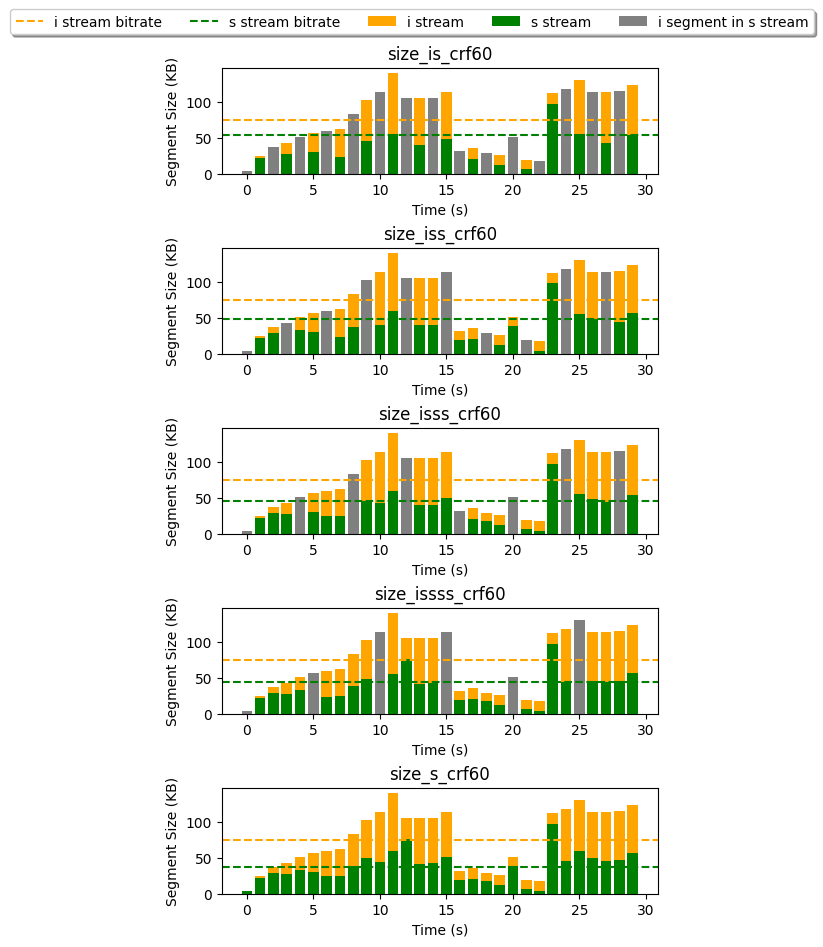

In [45]:
import math
duration = 30
df = pd.DataFrame({"time": range(duration)})
video = 'bbb'
seg_types = ['i', 'is', 'iss', 'isss', 'issss', 's']
crf = 45

for seg_type in seg_types:
    for crf in range(30, 61, 5):
        dash_dir = f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/dash/{video}/{video}1s_{duration}s_{seg_type}_crf{crf}"
        df[f"size_{seg_type}_crf{crf}"] = [os.path.getsize(f"{dash_dir}/segment_{s+1}.m4s") for s in range(duration)]

fig, ax = plt.subplots(5, 1, constrained_layout=True, figsize=(5, 9))


for i, seg_type in enumerate(seg_types[1:]):
    # lns = []
    name_s = f"size_{seg_type}_crf{crf}"
    name_i = f"size_i_crf{crf}"
    ax[i].bar(df.time, df[name_i] / 1000, color='orange')
    ax[i].bar(df.time, df[name_s] / 1000, color='green')
    is_i = [c.lower() == 'i' for c in seg_type]
    df['is_i'] = (is_i * math.ceil(duration/len(seg_type)))[:duration]
    ax[i].bar(df.time, (df[name_i]*df['is_i'])/1000, color='grey')
    ax[i].set_ylabel("Segment Size (KB)")
    ax[i].set_xlabel("Time (s)")
    ax[i].set_title(name_s)

    ax[i].axhline(y=df[name_i].mean() / 1000, color='orange', linestyle='--')
    ax[i].axhline(y=df[name_s].mean() / 1000, color='green', linestyle='--')
    
    
    # ax2 = ax.twinx()
    # lns.append(ax2.plot(df.time, df["motion_activity"], color="red", label='Motion Activity')[0])
    # ax2.set_ylabel("Motion Activity")

fig.legend(
    # lns,
    ['i stream bitrate', 's stream bitrate', 'i stream', 's stream', 'i segment'],
    loc='lower center',
    bbox_to_anchor=(0.5, 1),
    fancybox=True, shadow=True, ncol=5
)

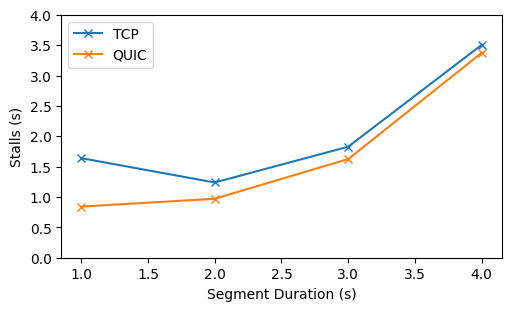

In [9]:
df = pd.DataFrame(
    {
        "segDuration": [1, 2, 3, 4],
        "DASH_quic": [
            842.2812053135464,
            971.3559320994785,
            1624.762041228158,
            3373.957054955619,
        ],
        "DASH_tcp": [
            1639.4834177834648,
            1238.830838884626,
            1828.2128061567034,
            3504.8680475779943,
        ],
    }
)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3))

ax.plot(df['segDuration'], df['DASH_tcp'] / 1000, label='TCP', marker='x')
ax.plot(df['segDuration'], df['DASH_quic'] / 1000, label='QUIC', marker='x')

ax.set_ylim([0, 4])
ax.set_xlabel('Segment Duration (s)')
ax.set_ylabel('Stalls (s)')
ax.legend()


Text(0, 0.5, 'Stall reduction (%)')

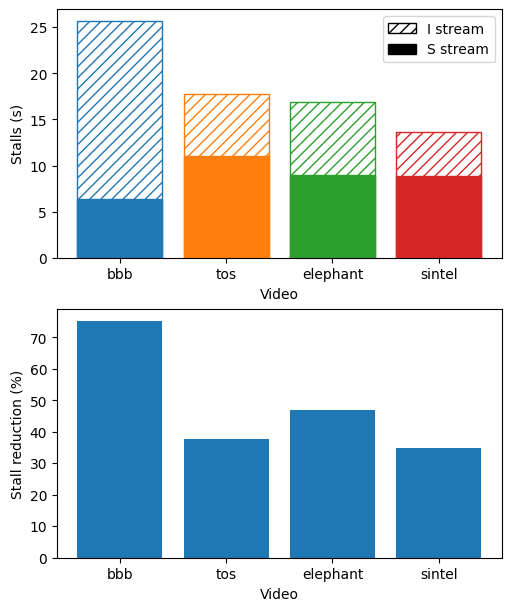

In [8]:
videos = ["bbb", "tos", "elephant", "sintel"]
df = pd.DataFrame(
    {
        "videoName": ["bbb", "tos", "elephant", "sintel"],
        "i": [
            25667.33717918396,
            17760.26201248169,
            16859.377145767212,
            13647.896766662598,
        ],
        "s": [
            6369.488954544067,
            11036.221027374268,
            8937.788009643555,
            8879.036903381348,
        ],
    }
)

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(5, 6))

bars1 = ax[0].bar(
    df["videoName"], df["i"] / 1000, label="I stream", fill=False, hatch="///"
)
bars2 = ax[0].bar(df["videoName"], df["s"] / 1000, label="S stream")

for i in range(len(videos)):
    bars1[i].set_color(COLORS[i])
    bars2[i].set_color(COLORS[i])

# ax.set_ylim([0, 4])
ax[0].set_xlabel("Video")
ax[0].set_ylabel("Stalls (s)")
ax[0].legend()

leg = ax[0].get_legend()
leg.legendHandles[0].set_color("black")
leg.legendHandles[1].set_color("black")

ax[1].bar(df["videoName"], (df["i"]-df["s"])*100/df["i"])
ax[1].set_xlabel("Video")
ax[1].set_ylabel("Stall reduction (%)")


bbb -0.98 -0.956
tos -0.9 -0.893


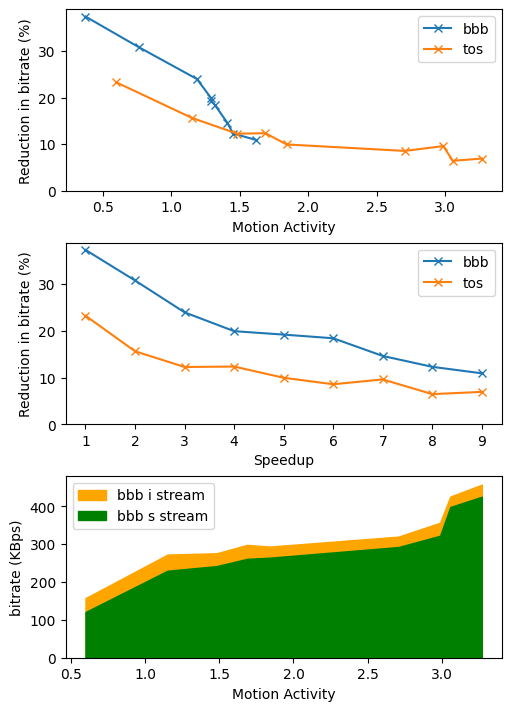

In [136]:
videos = ["bbb", "tos"]
fps = 24
duration = 30
crf = 45
data = []

for speedup in range(1, 10):
    row: dict = {"speedup": speedup}
    data.append(row)

    for video in videos:
        with open(
            f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/motion_activity/{video}_x{speedup}.json"
        ) as f:
            ma = load(f)
        row[f"{video}_ma"] = np.mean([sum(ma[fps * s : fps * (s + 1)]) / fps for s in range(duration)])

        for seg_type in ("i", "s"):
            dash_dir = f"/home/akram/ucalgary/research/istream-player/dataset/videos-raw/dash/{video}/{video}1s_{duration}s_{seg_type}_crf{crf}_x{speedup}"
            row[f"{video}_size_{seg_type}"] = np.mean([os.path.getsize(f"{dash_dir}/segment_{s+1}.m4s") for s in range(duration)])

df = pd.DataFrame.from_records(data)
fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(5, 7))

for video in videos:
    df[f"{video}_diff"] = (df[f"{video}_size_i"] - df[f"{video}_size_s"]) * 100 / df[f"{video}_size_i"]
    ax[0].plot(df[f"{video}_ma"], df[f"{video}_diff"], marker="x", label=video)
    ax[1].plot(df[f"speedup"], df[f"{video}_diff"], marker="x", label=video)

ax[0].set_ylim(bottom=0)
ax[0].set_xlabel("Motion Activity")
ax[0].set_ylabel("Reduction in bitrate (%)")

ax[1].set_ylim(bottom=0)
ax[1].set_xlabel("Speedup")
ax[1].set_ylabel("Reduction in bitrate (%)")

ax[0].legend()
ax[1].legend()


video = "bbb"
ax[2].stackplot(df[f"{video}_ma"], df[f"{video}_size_i"] / 1000, color="orange")
ax[2].stackplot(df[f"{video}_ma"], df[f"{video}_size_s"] / 1000, color="green")
ax[2].set_ylim(bottom=0)
ax[2].set_xlabel("Motion Activity")
ax[2].set_ylabel("bitrate (KBps)")
ax[2].legend(["bbb i stream", "bbb s stream"], loc="upper left")

for video in videos:
    print(video, round(df[f"{video}_ma"].corr(df[f"{video}_diff"]), 3), round(df[f"speedup"].corr(df[f"{video}_diff"]), 3))

# plt.plot()'
